<a href="https://colab.research.google.com/github/fahadrajput99/deep-learning/blob/main/build_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train , y_train) , (x_test , y_test)= keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,
        148, 210, 253, 253, 113,  87, 148,  55,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 232,
        252, 253, 189, 210, 252, 252, 253, 168,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  57, 242, 252,
        190,  65,   5,  12, 182, 252, 253, 116,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 183,
         14,   0,   0,  92, 252, 252, 225,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 253, 252, 146,  14,
          0,   0,   0, 215, 252, 252,  79,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 247, 176,   9,   0,
          0,   8,  78, 245, 253, 129,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 232, 252, 176,   0,   0,   0,
         36, 201, 252, 252, 169,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  22, 252, 252,  30,  22, 119, 197,
        241, 253, 252, 251,  77,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 231, 252, 253, 252, 252, 252,
        226, 227, 252, 231,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  55, 235, 253, 217, 138,  42,
         24, 192, 252, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62, 255, 253, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         71, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        106, 253, 252,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 255, 253,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 218, 252,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train_flatten=x_train.reshape(len(x_train) , 28*28)
x_test_flatten=x_test.reshape(len(x_test) , 28*28)

In [11]:
x_test_flatten.shape

(10000, 784)

In [12]:
model=keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784 ,) , activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten , y_train , epochs=7)

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4720 - accuracy: 0.8762
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9157
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.9237
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9262
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9272
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2588 - accuracy: 0.9283


In [16]:
y_test.shape

(10000,)

In [17]:
model.evaluate(x_test_flatten , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.9270


[0.2638379633426666, 0.9269999861717224]

In [18]:
y_predicted=model.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


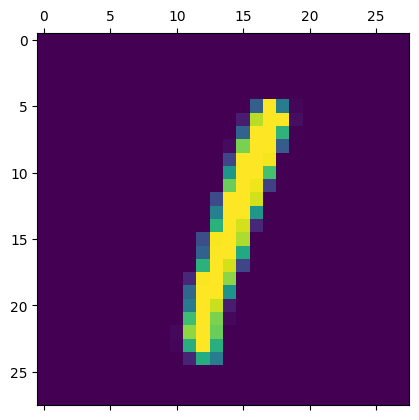

In [19]:
plt.matshow(x_test[5])

In [20]:
y_predicted[5]

array([3.2350956e-05, 9.9743146e-01, 5.0136447e-01, 3.8302004e-01,
       5.8059441e-03, 1.9543843e-02, 4.8716366e-03, 5.4118878e-01,
       5.3866178e-01, 1.3179478e-01], dtype=float32)

In [21]:
np.argmax(y_predicted[5])

1

In [22]:
y_predicted_label=[np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [23]:
cm=tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1108,    4,    2,    0,    1,    4,    2,   14,    0],
       [   3,    7,  932,   14,    7,    3,   11,    9,   44,    2],
       [   1,    0,   21,  924,    0,   19,    2,   11,   25,    7],
       [   1,    1,    7,    2,  916,    0,    8,    4,   11,   32],
       [   7,    2,    4,   41,    8,  769,   10,    6,   38,    7],
       [  11,    3,   11,    1,    7,   12,  906,    2,    5,    0],
       [   1,    6,   22,    9,    8,    1,    0,  948,    5,   28],
       [   4,    4,    7,   19,    9,   17,    7,    9,  893,    5],
       [   9,    6,    2,    9,   32,    5,    0,   20,   12,  914]],
      dtype=int32)>

<Axes: >

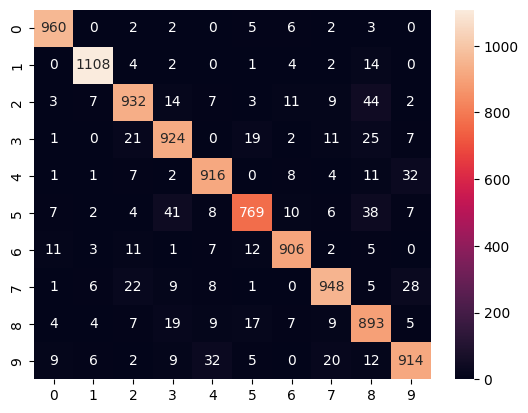

In [25]:
import seaborn as sns
sns.heatmap(cm, annot=True , fmt='d')

In [39]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100 , activation='relu'),
    keras.layers.Dense(10 , activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1271 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0529 - accuracy: 0.9835
